In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_style("whitegrid")
except ImportError:
    pass

pd.set_option("display.max_columns", 25)
pd.set_option("display.width", 120)
plt.rcParams["figure.figsize"] = (10, 5)
%matplotlib inline

In [4]:
df = pd.read_csv("pisos_sevilla.csv")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
df.head()

Shape: (1730, 20)

Columns: ['title', 'link', 'price_eur', 'price_display', 'currency', 'rooms', 'sq_meters', 'location', 'tags', 'seller', 'seller_url', 'description', 'listing_type', 'detail_title', 'detail_location', 'detail_price', 'detail_description', 'detail_updated', 'detail_features', 'detail_images']


,title,link,price_eur,price_display,currency,rooms,sq_meters,location,tags,seller,seller_url,description,listing_type,detail_title,detail_location,detail_price,detail_description,detail_updated,detail_features,detail_images
0,"Casa o chalet independiente en San Vicente, Se...",https://www.idealista.com/inmueble/107621327/,1700000,1.700.000 €,€,6.0,422,"Centro, Sevilla",Lujo,Gilmar Sevilla,https://www.idealista.com/pro/gilmar-sevilla/,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,venta,Casa o chalet independiente en venta en San Vi...,"Centro, Sevilla",422.0,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,NaN,"{""Características básicas"": [""Casa o chalet in...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
1,"Piso en San Vicente, Sevilla",https://www.idealista.com/inmueble/109264211/,2900000,2.900.000 €,€,3.0,333,"Centro, Sevilla",Lujo,Engel & Völkers Sevilla,https://www.idealista.com/pro/engel-sevilla/,Piso de lujo reformado en el Centro de Sevilla...,venta,Piso en venta en San Vicente,"Centro, Sevilla",333.0,Piso de lujo reformado en el Centro de Sevilla...,NaN,"{""Características básicas"": [""333 m² construid...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
2,"Piso en Arenal - Museo - Tetuán, Sevilla",https://www.idealista.com/inmueble/110180192/,1750000,1.750.000 €,€,5.0,311,"Centro, Sevilla",Lujo,Gilmar Sevilla,https://www.idealista.com/pro/gilmar-sevilla/,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,venta,Piso en venta en Arenal - Museo - Tetuán,"Centro, Sevilla",311.0,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,NaN,"{""Características básicas"": [""311 m² construid...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
3,Casa o chalet independiente en Arenal - Museo ...,https://www.idealista.com/inmueble/110364499/,2950000,2.950.000 €,€,6.0,458,"Centro, Sevilla",Lujo,Gilmar Sevilla,https://www.idealista.com/pro/gilmar-sevilla/,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,venta,Casa o chalet independiente en venta en Arenal...,"Centro, Sevilla",458.0,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALIZAD...,NaN,"{""Características básicas"": [""Casa o chalet in...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...
4,"Piso en Pasaje Del Marqués de Esquivel, 8, Ala...",https://www.idealista.com/inmueble/108390934/,240000,240.000 €,€,2.0,69,"Alameda, Sevilla",NaN,Italyca inmobiliaria,https://www.idealista.com/pro/p29003383/,"Piso en venta en pleno centro de Sevilla, a es...",venta,Piso en venta en Pasaje Del Marqués de Esquive...,"Alameda, Sevilla",69.0,"Piso en venta en pleno centro de Sevilla, a es...",NaN,"{""Características básicas"": [""69 m² construido...",https://img4.idealista.com/blur/WEB_DETAIL_TOP...


## 1. Data types and missing values

In [5]:
print(df.dtypes)
print("\n--- Missing values ---")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
pd.DataFrame({"count": missing, "pct": missing_pct}).sort_values("count", ascending=False)

title                  object
link                   object
price_eur               int64
price_display          object
currency               object
rooms                 float64
sq_meters               int64
location               object
tags                   object
seller                 object
seller_url             object
description            object
listing_type           object
detail_title           object
detail_location        object
detail_price          float64
detail_description     object
detail_updated        float64
detail_features        object
detail_images          object
dtype: object

--- Missing values ---


,count,pct
detail_updated,1730,100.0
tags,1556,89.9
seller,773,44.7
seller_url,773,44.7
detail_images,177,10.2
detail_title,175,10.1
detail_location,175,10.1
detail_description,175,10.1
detail_price,175,10.1
rooms,25,1.4


## 2. Clean numeric columns

In [6]:
# Ensure numeric types
df["price_eur"] = pd.to_numeric(df["price_eur"], errors="coerce")
df["rooms"] = pd.to_numeric(df["rooms"], errors="coerce")
df["sq_meters"] = pd.to_numeric(df["sq_meters"], errors="coerce")

# Price per m² (where we have both)
df["price_per_sqm"] = np.where(
    df["sq_meters"].gt(0),
    df["price_eur"] / df["sq_meters"],
    np.nan
)

df[["price_eur", "rooms", "sq_meters", "price_per_sqm"]].describe()

,price_eur,rooms,sq_meters,price_per_sqm
count,1.730000e+03,1705.000000,1730.000000,1730.000000
mean,4.160255e+05,3.183578,126.917341,3251.152562
std,4.283089e+05,1.407879,86.392152,1343.716378
min,2.100000e+04,1.000000,28.000000,342.078947
25%,2.100000e+05,2.000000,77.000000,2355.640854
50%,3.307500e+05,3.000000,106.000000,3105.263158
75%,4.762750e+05,4.000000,148.000000,4012.030157
max,7.956927e+06,22.000000,930.000000,12111.000000


## 3. Price distribution

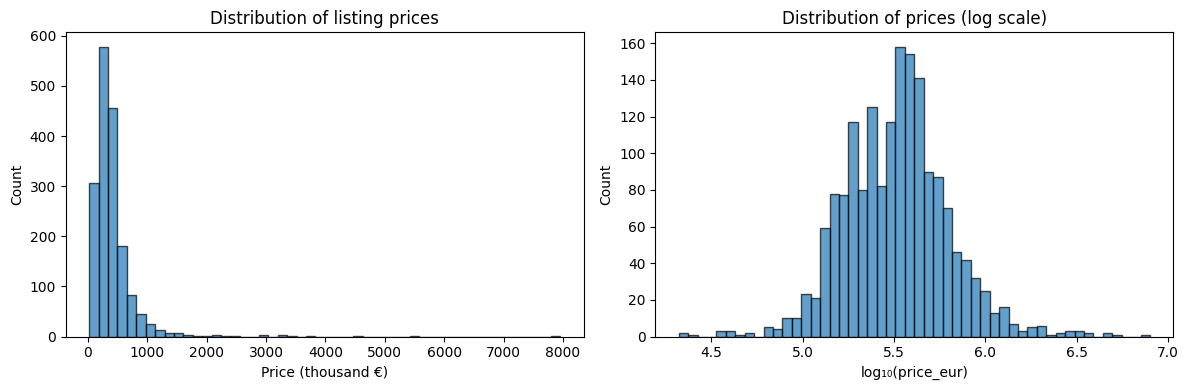

Price percentiles (€):
0.01      69926.1
0.05     125000.0
0.25     210000.0
0.50     330750.0
0.75     476275.0
0.95     950000.0
0.99    2135500.0
Name: price_eur, dtype: float64


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
price_ok = df["price_eur"].dropna()
price_ok = price_ok[price_ok > 0]
axes[0].hist(price_ok / 1_000, bins=50, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Price (thousand €)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of listing prices")

# Log scale to see shape better
axes[1].hist(np.log10(price_ok), bins=50, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("log₁₀(price_eur)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of prices (log scale)")
plt.tight_layout()
plt.show()

print("Price percentiles (€):")
print(df["price_eur"].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

## 4. Location analysis

Top 20 areas by number of listings:
location
Centro, Sevilla                                             127
Nervión, Sevilla                                            110
Palmas Altas, Sevilla                                        72
Gran Plaza - Marqués de Pickman - Ciudad Jardín, Sevilla     57
Sevilla este, Sevilla                                        44
Cerro Amate, Sevilla                                         42
Arenal - Museo - Tetuán, Sevilla                             41
Avenida de las Ciencias, Sevilla                             39
Torreblanca, Sevilla                                         39
Macarena, Sevilla                                            36
Triana, Sevilla                                              35
San Pablo, Sevilla                                           34
Bami - Pineda, Sevilla                                       34
Cerro del Águila, Sevilla                                    34
San Jerónimo, Sevilla                                      

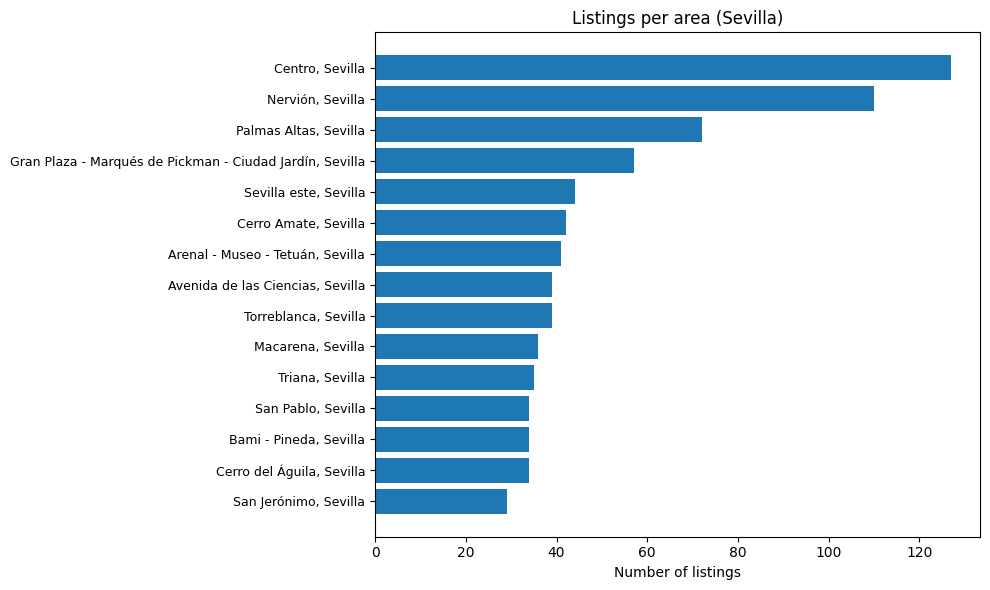

In [8]:
location_counts = df["location"].value_counts()
print("Top 20 areas by number of listings:")
print(location_counts.head(20).to_string())

fig, ax = plt.subplots(figsize=(10, 6))
top_locs = location_counts.head(15)
ax.barh(range(len(top_locs)), top_locs.values)
ax.set_yticks(range(len(top_locs)))
ax.set_yticklabels(top_locs.index, fontsize=9)
ax.invert_yaxis()
ax.set_xlabel("Number of listings")
ax.set_title("Listings per area (Sevilla)")
plt.tight_layout()
plt.show()

## 5. Rooms and surface (m²)

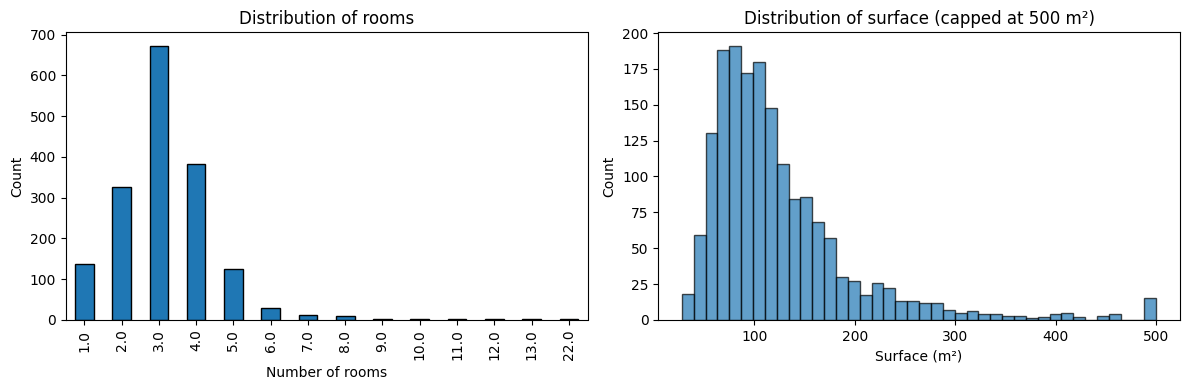

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df["rooms"].dropna().value_counts().sort_index().plot(kind="bar", ax=axes[0], edgecolor="black")
axes[0].set_xlabel("Number of rooms")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of rooms")

axes[1].hist(df["sq_meters"].dropna().clip(upper=500), bins=40, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("Surface (m²)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of surface (capped at 500 m²)")
plt.tight_layout()
plt.show()

## 6. Price by area (top 15 areas)

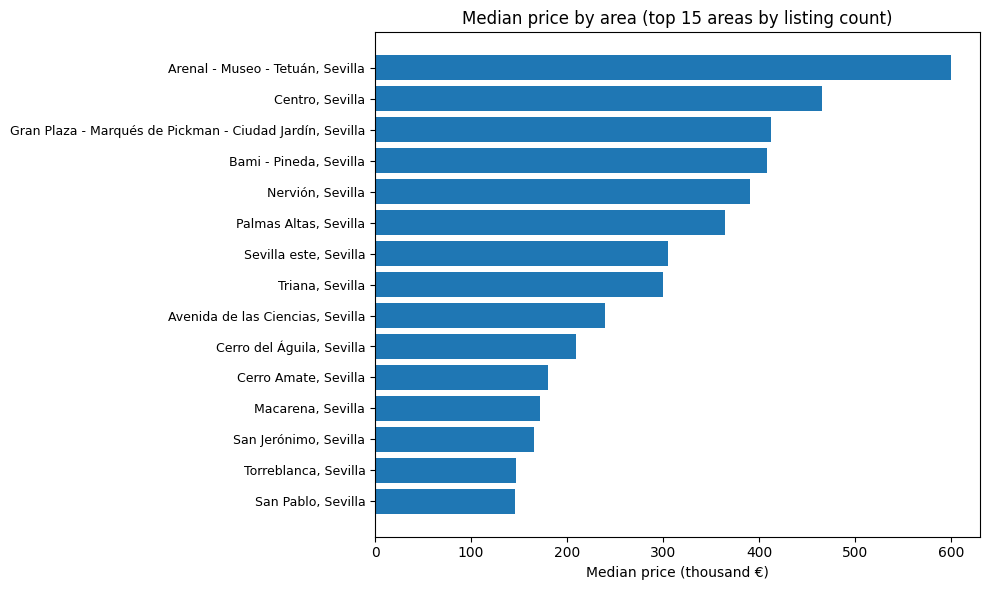


Median price by area (top 15, thousand €):
location
Calle Alisios, Reina Mercedes - Heliópolis, Sevilla           2150
Calle Alfonso XII, 1, Arenal - Museo - Tetuán, Sevilla        1800
Alfonso XII, Plaza de la Gavidia-San Lorenzo, Sevilla         1800
Calle Torneo, San Vicente, Sevilla                            1450
Calle Álvarez Quintero, Santa Cruz - Alfalfa, Sevilla         1450
Calle Miguel Cid, Plaza de la Gavidia-San Lorenzo, Sevilla    1150
Calle Alejandro Collantes, Nervión, Sevilla                   1050
Calle Espinosa y Cárcel, Nervión, Sevilla                      950
Plaza de Cuba - República Argentina, Sevilla                   950
Ronda de Capuchinos, San Julián, Sevilla                       855
Calle Albareda, 22, Arenal - Museo - Tetuán, Sevilla           848
Calle San Vicente, San Vicente, Sevilla                        835
Cuesta del Rosario, Santa Cruz - Alfalfa, Sevilla              770
Calle Corral del Rey, 15, Santa Cruz - Alfalfa, Sevilla        749
Calle Fel

In [10]:
top_areas = location_counts.head(15).index
subset = df[df["location"].isin(top_areas)].copy()
subset = subset[subset["price_eur"].notna() & (subset["price_eur"] > 0)]

# Median price by area (bar chart — no seaborn required)
median_by_area = df.groupby("location")["price_eur"].median().sort_values(ascending=False)
top_medians = median_by_area[median_by_area.index.isin(top_areas)].sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(top_medians)), top_medians.values / 1_000)
ax.set_yticks(range(len(top_medians)))
ax.set_yticklabels(top_medians.index, fontsize=9)
ax.set_xlabel("Median price (thousand €)")
ax.set_title("Median price by area (top 15 areas by listing count)")
plt.tight_layout()
plt.show()

print("\nMedian price by area (top 15, thousand €):")
print((median_by_area.head(15) / 1_000).round(0).astype(int).to_string())

## 7. Price per m²

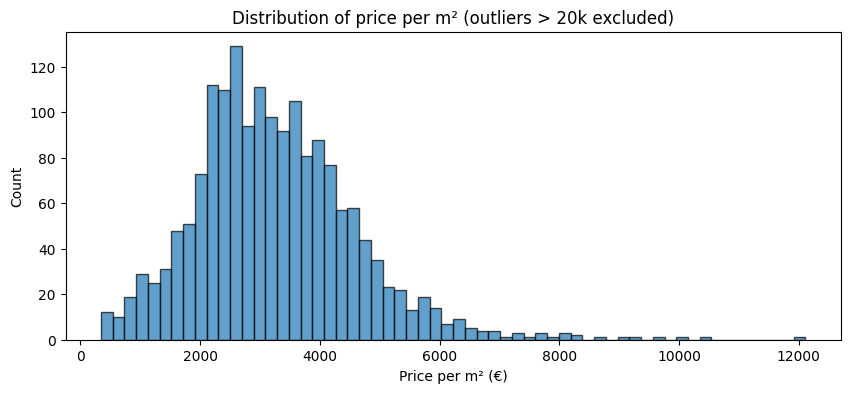

Price per m² — percentiles (€):
0.25    2356.0
0.50    3105.0
0.75    4012.0
0.90    4868.0
Name: price_per_sqm, dtype: float64


In [11]:
ppsm = df["price_per_sqm"].dropna()
ppsm = ppsm[(ppsm > 0) & (ppsm < 20000)]  # exclude extreme outliers
plt.figure(figsize=(10, 4))
plt.hist(ppsm, bins=60, edgecolor="black", alpha=0.7)
plt.xlabel("Price per m² (€)")
plt.ylabel("Count")
plt.title("Distribution of price per m² (outliers > 20k excluded)")
plt.show()

print("Price per m² — percentiles (€):")
print(df["price_per_sqm"].quantile([0.25, 0.5, 0.75, 0.9]).round(0))

## 8. Relationships: price vs rooms and surface

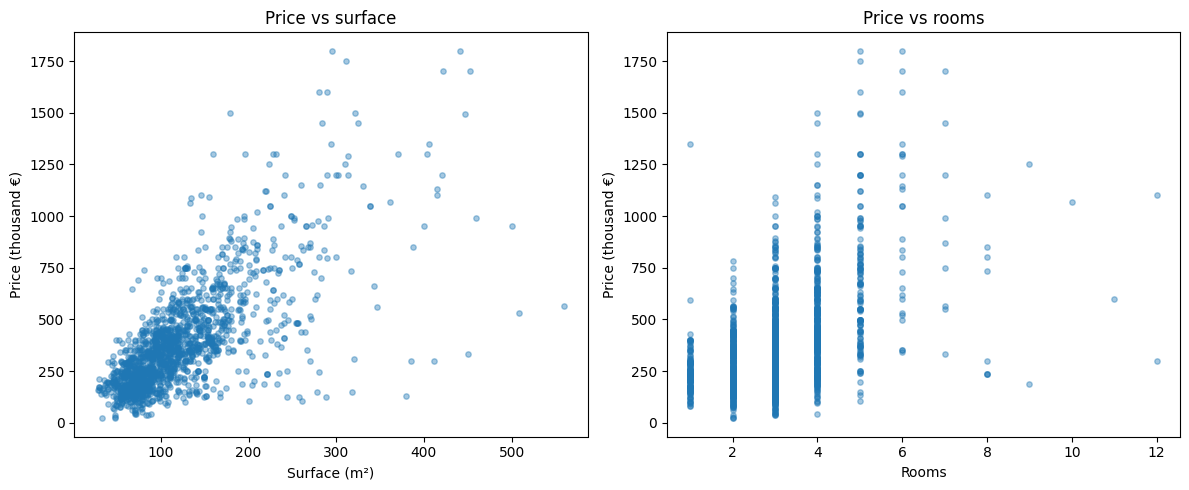

In [12]:
plot_df = df[df["price_eur"].notna() & (df["price_eur"] > 0) & (df["price_eur"] < 2_000_000)]
plot_df = plot_df[plot_df["sq_meters"].notna() & (plot_df["sq_meters"] > 0) & (plot_df["sq_meters"] < 600)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(plot_df["sq_meters"], plot_df["price_eur"] / 1_000, alpha=0.4, s=15)
axes[0].set_xlabel("Surface (m²)")
axes[0].set_ylabel("Price (thousand €)")
axes[0].set_title("Price vs surface")

axes[1].scatter(plot_df["rooms"], plot_df["price_eur"] / 1_000, alpha=0.4, s=15)
axes[1].set_xlabel("Rooms")
axes[1].set_ylabel("Price (thousand €)")
axes[1].set_title("Price vs rooms")
plt.tight_layout()
plt.show()

## 9. Tags and listing type

In [13]:
print("Listing type value counts:")
print(df["listing_type"].value_counts(dropna=False).to_string())
print("\nTags (non-null) value counts:")
print(df["tags"].value_counts(dropna=False).head(15).to_string())

Listing type value counts:
listing_type
venta    1730

Tags (non-null) value counts:
tags
NaN                       1556
Alquilada                   56
Apartamento                 36
Lujo                        31
Ocupada ilegalmente         21
Villa                        6
Nuda propiedad               6
Alquilada; Apartamento       4
En exclusiva                 3
Luminoso                     3
Loft                         2
Reformado                    1
Lujo; Villa                  1
Con vistas                   1
Cortijo                      1


## 10. Summary statistics

In [14]:
print("Total listings:", len(df))
print("Unique locations:", df["location"].nunique())
print("Price range: {:.0f} € – {:.0f} €".format(df["price_eur"].min(), df["price_eur"].max()))
print("Median price: {:.0f} €".format(df["price_eur"].median()))
print("Listings with rooms: {:.0%}".format(df["rooms"].notna().mean()))
print("Listings with sq_meters: {:.0%}".format(df["sq_meters"].notna().mean()))
print("Listings with description: {:.0%}".format(df["description"].notna().mean()))

Total listings: 1730
Unique locations: 204
Price range: 21000 € – 7956927 €
Median price: 330750 €
Listings with rooms: 99%
Listings with sq_meters: 100%
Listings with description: 100%


## 11. Focus: 3+ rooms and central Sevilla

Seville is divided into **11 districts** and 108 neighbourhoods. The most central areas are ([source: Wikipedia](https://en.wikipedia.org/wiki/Districts_and_neighbourhoods_of_Seville)):

- **Casco Antiguo** (old town / city centre): Santa Cruz, Santa Catalina, San Vicente, San Lorenzo, San Gil, Museo, Arenal, Alfalfa, San Bartolomé, Feria, Encarnación-Regina, etc. — Cathedral, Alcázar, Torre del Oro.
- **Triana** — west bank of the Guadalquivir, traditional and well connected to the centre.
- **Macarena** — north of Casco Antiguo, historic (city walls, Basilica).
- **Nervión** — east of centre; second focal point of the city, Santa Justa station, commercial hub.
- **Distrito Sur** — south of Casco Antiguo: María Luisa, Prado, Parque de María Luisa, Plaza de España.
- **Los Remedios** — west bank, south of Triana; Feria de Abril area.

Below we filter listings with **3 or more rooms** and flag **central** areas using these districts/neighbourhoods.

In [15]:
# Central Sevilla: keywords matching district/neighbourhood names (from Wikipedia)
CENTRAL_KEYWORDS = [
    "Centro", "Santa Cruz", "Arenal", "Museo", "Tetuán", "Alfalfa", "San Vicente",
    "San Lorenzo", "San Gil", "Macarena", "Triana", "Nervión", "Nervion",
    "María Luisa", "Maria Luisa", "Prado", "Remedios", "Encarnación", "Feria",
    "Santa Catalina", "Regina", "Buhaira", "San Bartolomé", "Santa Cruz",
]

def is_central(loc):
    if pd.isna(loc):
        return False
    loc = str(loc)
    return any(kw.lower() in loc.lower() for kw in CENTRAL_KEYWORDS)

# Filter: 3 or more rooms (and ensure numeric)
df["rooms"] = pd.to_numeric(df["rooms"], errors="coerce")
df_3plus = df[df["rooms"] >= 3].copy()
df_3plus["is_central"] = df_3plus["location"].map(is_central)

print("Listings with 3+ rooms:", len(df_3plus))
print("Of these, in central areas:", df_3plus["is_central"].sum())
print("Share of 3+ rooms in central areas: {:.1%}".format(df_3plus["is_central"].mean()))
print("\nCentral areas (3+ rooms) — value counts:")
print(df_3plus.loc[df_3plus["is_central"], "location"].value_counts().head(20).to_string())

Listings with 3+ rooms: 1242
Of these, in central areas: 385
Share of 3+ rooms in central areas: 31.0%

Central areas (3+ rooms) — value counts:
location
Nervión, Sevilla                                                         86
Centro, Sevilla                                                          73
Arenal - Museo - Tetuán, Sevilla                                         33
Macarena, Sevilla                                                        30
Los Remedios, Sevilla                                                    25
Triana, Sevilla                                                          23
Ronda de Triana-Patrocinio-Turruñuelo, Sevilla                           15
Santa Cruz - Alfalfa, Sevilla                                            14
Plaza de la Gavidia-San Lorenzo, Sevilla                                 12
Feria, Sevilla                                                           12
Buhaira - Huerta del Rey, Sevilla                                         9
Encarnació

### 11.1 Central areas (3+ rooms): count and median price per area

In [16]:
# Ensure price_per_sqm exists for df_3plus (from df)
if "price_per_sqm" not in df_3plus.columns:
    df_3plus["price_per_sqm"] = np.where(
        df_3plus["sq_meters"].gt(0),
        df_3plus["price_eur"] / df_3plus["sq_meters"],
        np.nan,
    )

central_3plus = df_3plus[df_3plus["is_central"]].copy()
by_area = central_3plus.groupby("location").agg(
    count=("price_eur", "count"),
    median_price_eur=("price_eur", "median"),
    median_price_per_sqm=("price_per_sqm", "median"),
    median_rooms=("rooms", "median"),
    median_sqm=("sq_meters", "median"),
).sort_values("count", ascending=False)

by_area["median_price_k"] = (by_area["median_price_eur"] / 1_000).round(0)
by_area["median_ppsm"] = by_area["median_price_per_sqm"].round(0)
print("Central areas — 3+ rooms: count, median price (€), median price/m², median rooms, median m²")
display(by_area[["count", "median_price_k", "median_ppsm", "median_rooms", "median_sqm"]].head(20))

Central areas — 3+ rooms: count, median price (€), median price/m², median rooms, median m²


,count,median_price_k,median_ppsm,median_rooms,median_sqm
location,,,,,
"Nervión, Sevilla",86,420.0,3491.0,4.0,119.0
"Centro, Sevilla",73,579.0,4069.0,4.0,155.0
"Arenal - Museo - Tetuán, Sevilla",33,815.0,4292.0,4.0,170.0
"Macarena, Sevilla",30,187.0,2373.0,3.0,75.5
"Los Remedios, Sevilla",25,670.0,4085.0,4.0,164.0
"Triana, Sevilla",23,332.0,3538.0,3.0,94.0
"Ronda de Triana-Patrocinio-Turruñuelo, Sevilla",15,498.0,3641.0,3.0,122.0
"Santa Cruz - Alfalfa, Sevilla",14,770.0,4186.0,4.0,179.0
"Feria, Sevilla",12,475.0,3699.0,3.0,126.0


### 11.2 Price comparison: central vs non-central (3+ rooms)

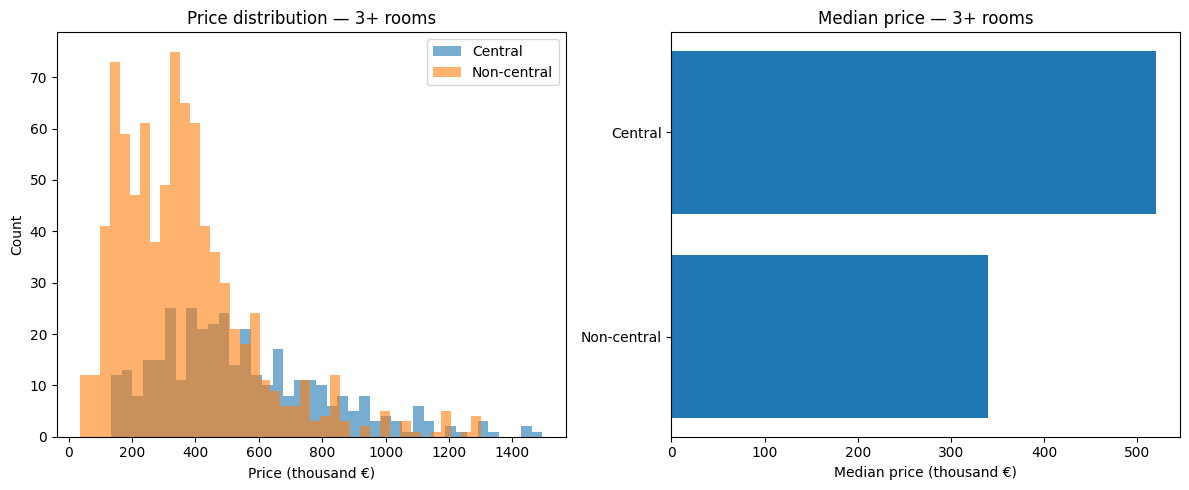

Summary — 3+ rooms:
             count  median_price  median_ppsm
Non-central    857      340000.0       2622.0
Central        385      519700.0       3750.0


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Price distribution
for label, subset in [("Central", df_3plus[df_3plus["is_central"]]), ("Non-central", df_3plus[~df_3plus["is_central"]])]:
    prices = subset["price_eur"].dropna()
    prices = prices[(prices > 0) & (prices < 1_500_000)]
    axes[0].hist(prices / 1_000, bins=40, alpha=0.6, label=label)
axes[0].set_xlabel("Price (thousand €)")
axes[0].set_ylabel("Count")
axes[0].set_title("Price distribution — 3+ rooms")
axes[0].legend()

# Median price by central vs non-central
summary = df_3plus.groupby("is_central").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_ppsm=("price_per_sqm", "median"),
)
summary.index = ["Non-central", "Central"]
axes[1].barh(summary.index, summary["median_price"] / 1_000)
axes[1].set_xlabel("Median price (thousand €)")
axes[1].set_title("Median price — 3+ rooms")
plt.tight_layout()
plt.show()

print("Summary — 3+ rooms:")
print(summary[["count", "median_price", "median_ppsm"]].round(0))

### 11.3 Median price by central area (top 12, 3+ rooms)

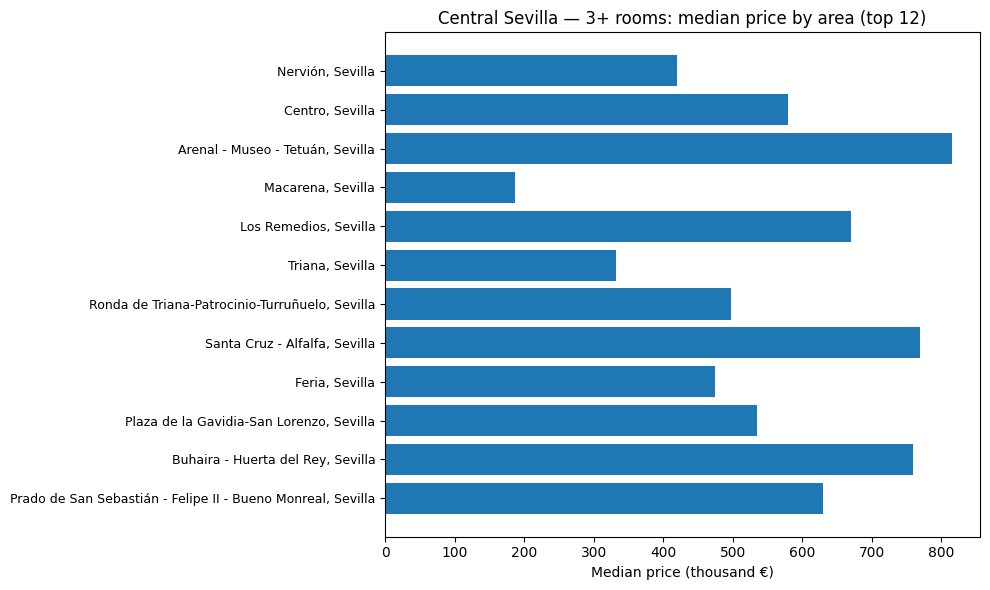

In [18]:
# Bar chart: median price by central area (3+ rooms, top 12 by count)
top_central = by_area.head(12)
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(top_central))
ax.barh(y_pos, top_central["median_price_eur"] / 1_000)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_central.index, fontsize=9)
ax.set_xlabel("Median price (thousand €)")
ax.set_title("Central Sevilla — 3+ rooms: median price by area (top 12)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 12. Deep analysis: 4+ room flats

Focused analysis of listings with **4 or more rooms**: volume, geography, price and surface distributions, central vs non-central, and breakdown by number of rooms (4, 5, 6+).

In [19]:
# Filter: 4+ rooms (reuse is_central from section 11)
df_4plus = df[df["rooms"] >= 4].copy()
df_4plus["is_central"] = df_4plus["location"].map(is_central)
if "price_per_sqm" not in df_4plus.columns:
    df_4plus["price_per_sqm"] = np.where(
        df_4plus["sq_meters"].gt(0),
        df_4plus["price_eur"] / df_4plus["sq_meters"],
        np.nan,
    )

n_4plus = len(df_4plus)
n_central = df_4plus["is_central"].sum()
print("Total listings with 4+ rooms:", n_4plus)
print("Share of full dataset: {:.1%}".format(n_4plus / len(df)))
print("In central areas:", n_central, "({:.1%})".format(n_central / n_4plus if n_4plus else 0))
print("\nRooms distribution (4+ only):")
print(df_4plus["rooms"].value_counts().sort_index().to_string())

Total listings with 4+ rooms: 570
Share of full dataset: 32.9%
In central areas: 194 (34.0%)

Rooms distribution (4+ only):
rooms
4.0     383
5.0     126
6.0      29
7.0      11
8.0      10
9.0       2
10.0      3
11.0      1
12.0      3
13.0      1
22.0      1


### 12.1 Numeric summary (4+ rooms)

In [20]:
df_4plus[["price_eur", "rooms", "sq_meters", "price_per_sqm"]].describe()

,price_eur,rooms,sq_meters,price_per_sqm
count,5.700000e+02,570.000000,570.000000,570.000000
mean,6.271277e+05,4.601754,188.291228,3260.929559
std,5.590325e+05,1.389515,112.962937,1331.913510
min,4.200000e+04,4.000000,52.000000,406.130268
25%,3.500000e+05,4.000000,126.000000,2454.606285
50%,4.850000e+05,4.000000,157.000000,3123.193642
75%,7.296750e+05,5.000000,210.000000,3893.733850
max,5.450000e+06,22.000000,930.000000,10439.560440


### 12.2 Price distribution and percentiles (4+ rooms)

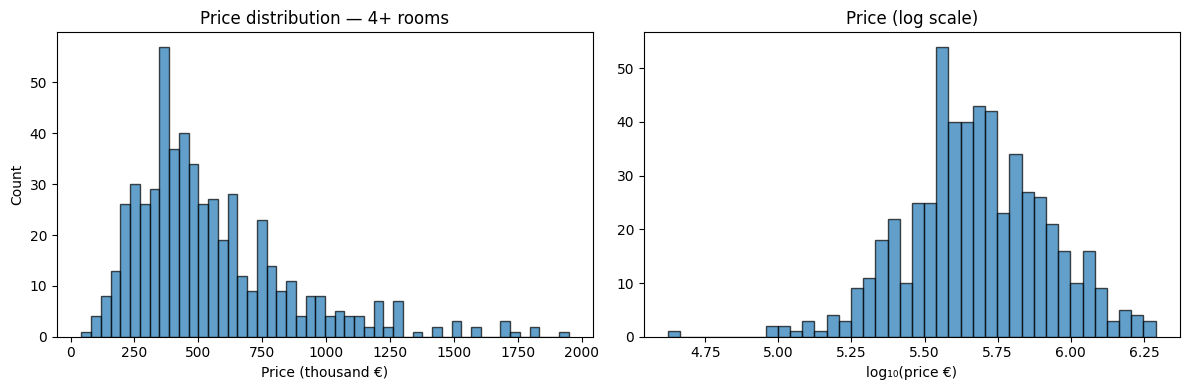

Price percentiles (€) — 4+ rooms:
0.01     124444.0
0.05     197933.0
0.25     350000.0
0.50     485000.0
0.75     729675.0
0.90    1090100.0
0.99    3231000.0
Name: price_eur, dtype: float64


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p = df_4plus["price_eur"].dropna()
p = p[(p > 0) & (p < 2_000_000)]
axes[0].hist(p / 1_000, bins=50, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Price (thousand €)")
axes[0].set_ylabel("Count")
axes[0].set_title("Price distribution — 4+ rooms")

axes[1].hist(np.log10(p), bins=40, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("log₁₀(price €)")
axes[1].set_title("Price (log scale)")
plt.tight_layout()
plt.show()

print("Price percentiles (€) — 4+ rooms:")
print(df_4plus["price_eur"].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.99]).round(0))

### 12.3 Central vs non-central (4+ rooms)

4+ rooms — Central vs non-central:


,count,median_price,median_sqm,median_ppsm
Non-central,376,403500.0,151.0,2722.0
Central,194,664500.0,170.0,3750.0


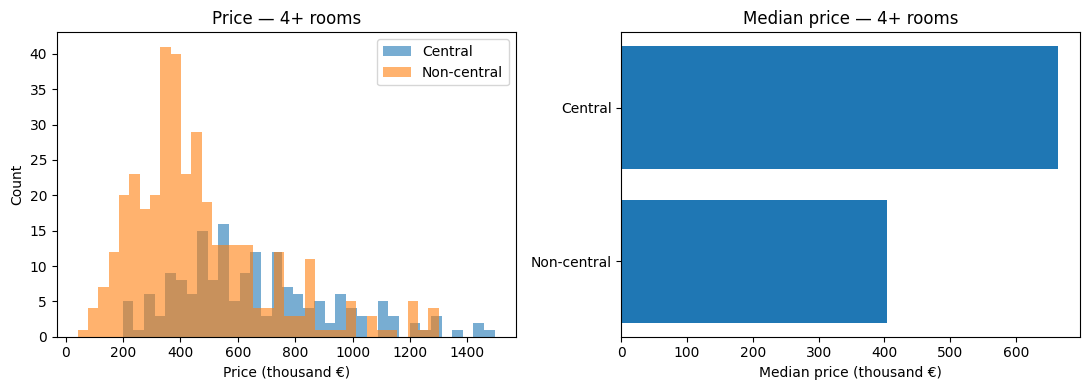

In [22]:
summary_4 = df_4plus.groupby("is_central").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
)
summary_4.index = ["Non-central", "Central"]
print("4+ rooms — Central vs non-central:")
display(summary_4.round(0))

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
for label, sub in [("Central", df_4plus[df_4plus["is_central"]]), ("Non-central", df_4plus[~df_4plus["is_central"]])]:
    pr = sub["price_eur"].dropna()
    pr = pr[(pr > 0) & (pr < 1_500_000)]
    axes[0].hist(pr / 1_000, bins=35, alpha=0.6, label=label)
axes[0].set_xlabel("Price (thousand €)")
axes[0].set_ylabel("Count")
axes[0].set_title("Price — 4+ rooms")
axes[0].legend()

axes[1].barh(summary_4.index, summary_4["median_price"] / 1_000)
axes[1].set_xlabel("Median price (thousand €)")
axes[1].set_title("Median price — 4+ rooms")
plt.tight_layout()
plt.show()

### 12.4 Surface (m²) distribution — 4+ rooms

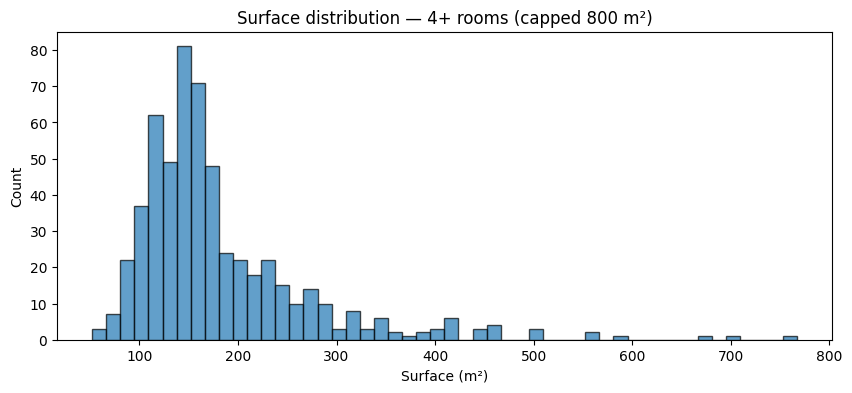

Surface percentiles (m²): 0.25    126.0
0.50    157.0
0.75    210.0
0.90    291.0


In [23]:
sqm = df_4plus["sq_meters"].dropna()
sqm = sqm[(sqm > 0) & (sqm < 800)]
plt.figure(figsize=(10, 4))
plt.hist(sqm, bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Surface (m²)")
plt.ylabel("Count")
plt.title("Surface distribution — 4+ rooms (capped 800 m²)")
plt.show()
print("Surface percentiles (m²):", df_4plus["sq_meters"].quantile([0.25, 0.5, 0.75, 0.9]).round(0).to_string())

### 12.5 Areas with most 4+ room listings

All areas — 4+ rooms (top 25 by count):


,count,median_price,median_sqm,median_ppsm
location,,,,
"Nervión, Sevilla",49,500000.0,144.0,3409.0
"Centro, Sevilla",37,800000.0,209.0,4036.0
"Gran Plaza - Marqués de Pickman - Ciudad Jardín, Sevilla",22,494750.0,148.0,3205.0
"Palmas Altas, Sevilla",21,404000.0,158.0,2488.0
"Santa Clara, Sevilla",20,435000.0,170.0,2590.0
"Sevilla este, Sevilla",19,354000.0,127.0,2362.0
"Arenal - Museo - Tetuán, Sevilla",18,985000.0,199.0,4863.0
"Los Remedios, Sevilla",17,684000.0,178.0,3974.0
"Jardines de Hércules, Sevilla",15,381500.0,144.0,2644.0


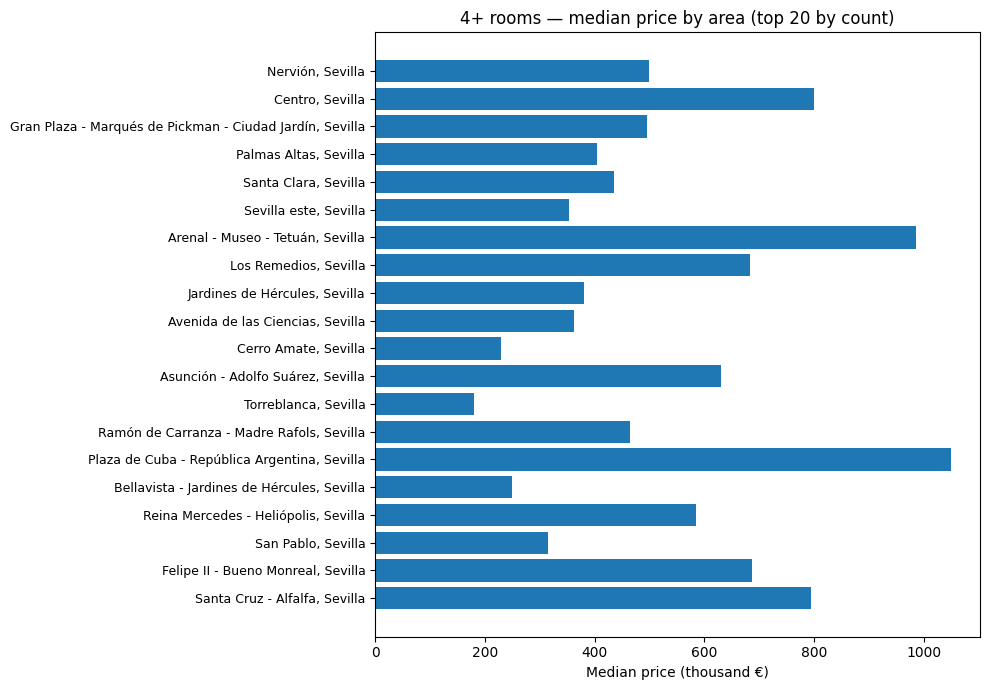

In [24]:
by_area_4 = df_4plus.groupby("location").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).sort_values("count", ascending=False)

print("All areas — 4+ rooms (top 25 by count):")
display(by_area_4.head(25).round(0))

fig, ax = plt.subplots(figsize=(10, 7))
top20 = by_area_4.head(20)
ax.barh(range(len(top20)), top20["median_price"] / 1_000)
ax.set_yticks(range(len(top20)))
ax.set_yticklabels(top20.index, fontsize=9)
ax.set_xlabel("Median price (thousand €)")
ax.set_title("4+ rooms — median price by area (top 20 by count)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### 12.6 Central areas only — 4+ rooms (count, median price, €/m²)

In [25]:
central_4 = df_4plus[df_4plus["is_central"]]
by_central_4 = central_4.groupby("location").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).sort_values("count", ascending=False)

print("Central Sevilla — 4+ rooms:")
display(by_central_4.round(0))

Central Sevilla — 4+ rooms:


,count,median_price,median_sqm,median_ppsm
location,,,,
"Nervión, Sevilla",49,500000.0,144.0,3409.0
"Centro, Sevilla",37,800000.0,209.0,4036.0
"Arenal - Museo - Tetuán, Sevilla",18,985000.0,199.0,4863.0
"Los Remedios, Sevilla",17,684000.0,178.0,3974.0
"Santa Cruz - Alfalfa, Sevilla",8,795000.0,179.0,4171.0
"Macarena, Sevilla",7,289000.0,101.0,2861.0
"Ronda de Triana-Patrocinio-Turruñuelo, Sevilla",7,739900.0,147.0,3765.0
"Prado de San Sebastián - Felipe II - Bueno Monreal, Sevilla",6,590000.0,159.0,3503.0
"Feria, Sevilla",5,750000.0,190.0,3901.0


### 12.7 Breakdown by room count: 4 vs 5 vs 6+ rooms

4+ rooms — by number of rooms:


,count,median_price,median_sqm,median_ppsm
room_group,,,,
4,383,425000.0,142.0,3023.0
5,126,617500.0,188.0,3214.0
6+,61,1050000.0,325.0,3196.0


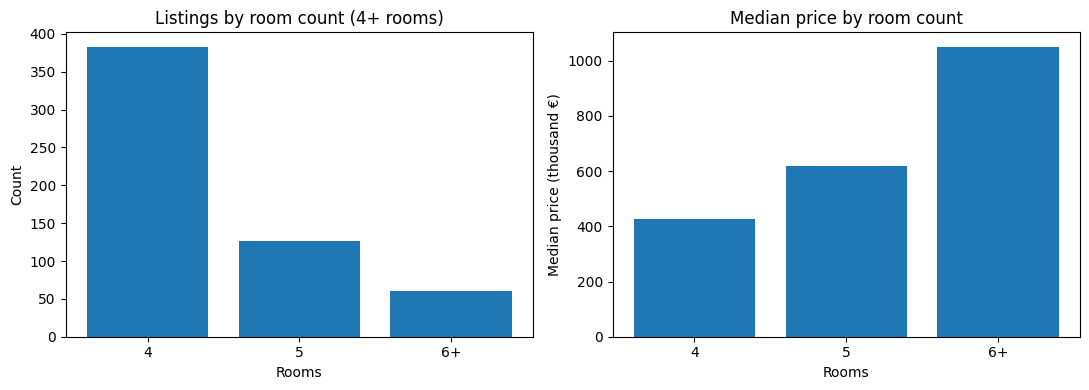

In [26]:
df_4plus["room_group"] = np.where(df_4plus["rooms"] >= 6, "6+", df_4plus["rooms"].astype(int).astype(str))
by_rooms = df_4plus.groupby("room_group").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).reindex(["4", "5", "6+"])

print("4+ rooms — by number of rooms:")
display(by_rooms.round(0))

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
axes[0].bar(by_rooms.index, by_rooms["count"])
axes[0].set_xlabel("Rooms")
axes[0].set_ylabel("Count")
axes[0].set_title("Listings by room count (4+ rooms)")

axes[1].bar(by_rooms.index, by_rooms["median_price"] / 1_000)
axes[1].set_xlabel("Rooms")
axes[1].set_ylabel("Median price (thousand €)")
axes[1].set_title("Median price by room count")
plt.tight_layout()
plt.show()

### 12.8 Price vs surface — 4+ rooms (scatter)

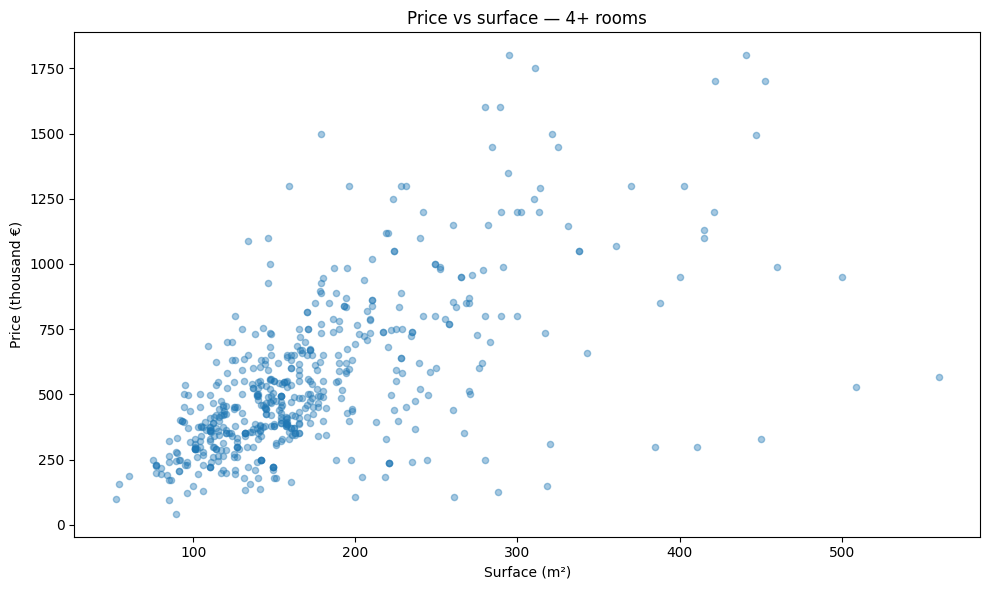

In [27]:
plot_4 = df_4plus.dropna(subset=["price_eur", "sq_meters"])
plot_4 = plot_4[(plot_4["price_eur"] > 0) & (plot_4["price_eur"] < 2_000_000)]
plot_4 = plot_4[(plot_4["sq_meters"] > 0) & (plot_4["sq_meters"] < 600)]

plt.figure(figsize=(10, 6))
plt.scatter(plot_4["sq_meters"], plot_4["price_eur"] / 1_000, alpha=0.4, s=20)
plt.xlabel("Surface (m²)")
plt.ylabel("Price (thousand €)")
plt.title("Price vs surface — 4+ rooms")
plt.tight_layout()
plt.show()

### 12.9 Price per m² — 4+ rooms

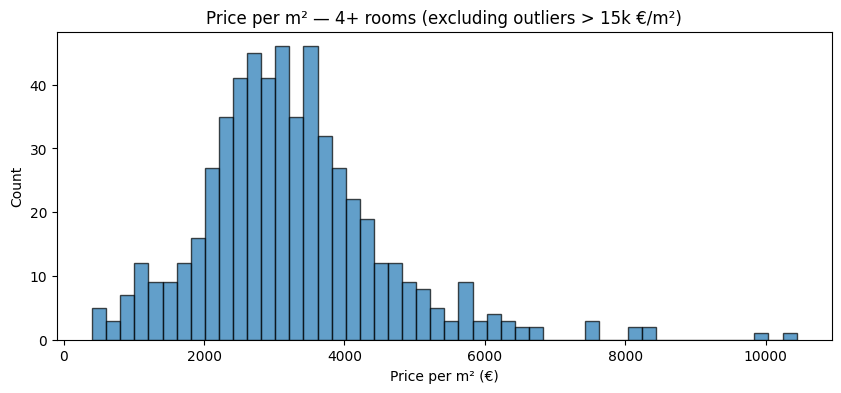

Price per m² percentiles (€): 0.25    2455.0
0.50    3123.0
0.75    3894.0
0.90    4812.0


In [28]:
ppsm_4 = df_4plus["price_per_sqm"].dropna()
ppsm_4 = ppsm_4[(ppsm_4 > 0) & (ppsm_4 < 15_000)]
plt.figure(figsize=(10, 4))
plt.hist(ppsm_4, bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Price per m² (€)")
plt.ylabel("Count")
plt.title("Price per m² — 4+ rooms (excluding outliers > 15k €/m²)")
plt.show()
print("Price per m² percentiles (€):", df_4plus["price_per_sqm"].quantile([0.25, 0.5, 0.75, 0.9]).round(0).to_string())

## 13. Análisis exclusivo: 3 habitaciones y más de 70 m²

Análisis centrado solo en pisos de **exactamente 3 habitaciones** y **más de 70 m²** de superficie.

In [ ]:
# Filtro: 3 habitaciones y más de 70 m² (reutilizamos is_central de la sección 11)
df["sq_meters"] = pd.to_numeric(df["sq_meters"], errors="coerce")
df_3rooms_70 = df[(df["rooms"] == 3) & (df["sq_meters"] > 70)].copy()
df_3rooms_70["is_central"] = df_3rooms_70["location"].map(is_central)
if "price_per_sqm" not in df_3rooms_70.columns:
    df_3rooms_70["price_per_sqm"] = np.where(
        df_3rooms_70["sq_meters"].gt(0),
        df_3rooms_70["price_eur"] / df_3rooms_70["sq_meters"],
        np.nan,
    )

n = len(df_3rooms_70)
n_cent = df_3rooms_70["is_central"].sum()
print("Total: 3 hab. y >70 m²:", n)
print("Del total del dataset: {:.1%}".format(n / len(df)))
print("En zona central:", n_cent, "({:.1%})".format(n_cent / n if n else 0))
print("\nDistribución de superficie (m²):")
print(df_3rooms_70["sq_meters"].describe().round(0))

### 13.1 Resumen numérico (3 hab., >70 m²)

In [ ]:
df_3rooms_70[["price_eur", "rooms", "sq_meters", "price_per_sqm"]].describe()

### 13.2 Distribución de precios y percentiles

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p = df_3rooms_70["price_eur"].dropna()
p = p[(p > 0) & (p < 1_500_000)]
axes[0].hist(p / 1_000, bins=45, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Precio (miles €)")
axes[0].set_ylabel("N")
axes[0].set_title("3 hab. y >70 m² — distribución de precios")

axes[1].hist(np.log10(p), bins=40, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("log₁₀(precio €)")
axes[1].set_title("Precio (escala log)")
plt.tight_layout()
plt.show()

print("Percentiles de precio (€) — 3 hab. >70 m²:")
print(df_3rooms_70["price_eur"].quantile([0.05, 0.25, 0.5, 0.75, 0.95]).round(0))

### 13.3 Central vs no central (3 hab., >70 m²)

In [ ]:
sum_3_70 = df_3rooms_70.groupby("is_central").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
)
sum_3_70.index = ["No central", "Central"]
print("3 hab. >70 m² — Central vs no central:")
display(sum_3_70.round(0))

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
for label, sub in [("Central", df_3rooms_70[df_3rooms_70["is_central"]]), ("No central", df_3rooms_70[~df_3rooms_70["is_central"]])]:
    pr = sub["price_eur"].dropna()
    pr = pr[(pr > 0) & (pr < 1_200_000)]
    axes[0].hist(pr / 1_000, bins=35, alpha=0.6, label=label)
axes[0].set_xlabel("Precio (miles €)")
axes[0].set_ylabel("N")
axes[0].set_title("3 hab. >70 m² — precios")
axes[0].legend()

axes[1].barh(sum_3_70.index, sum_3_70["median_price"] / 1_000)
axes[1].set_xlabel("Precio mediano (miles €)")
axes[1].set_title("Precio mediano — 3 hab. >70 m²")
plt.tight_layout()
plt.show()

### 13.4 Zonas con más oferta (3 hab., >70 m²)

In [ ]:
by_area_3_70 = df_3rooms_70.groupby("location").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).sort_values("count", ascending=False)

print("Todas las zonas — 3 hab. >70 m² (top 20 por número de anuncios):")
display(by_area_3_70.head(20).round(0))

fig, ax = plt.subplots(figsize=(10, 6))
top15 = by_area_3_70.head(15)
ax.barh(range(len(top15)), top15["median_price"] / 1_000)
ax.set_yticks(range(len(top15)))
ax.set_yticklabels(top15.index, fontsize=9)
ax.set_xlabel("Precio mediano (miles €)")
ax.set_title("3 hab. >70 m² — precio mediano por zona (top 15)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### 13.5 Solo zonas centrales (3 hab., >70 m²)

In [ ]:
central_3_70 = df_3rooms_70[df_3rooms_70["is_central"]]
by_cent_3_70 = central_3_70.groupby("location").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).sort_values("count", ascending=False)

print("Zonas centrales — 3 hab. >70 m²:")
display(by_cent_3_70.round(0))

### 13.6 Precio vs superficie (3 hab., >70 m²)

In [ ]:
plot_3_70 = df_3rooms_70.dropna(subset=["price_eur", "sq_meters"])
plot_3_70 = plot_3_70[(plot_3_70["price_eur"] > 0) & (plot_3_70["price_eur"] < 1_200_000)]
plot_3_70 = plot_3_70[(plot_3_70["sq_meters"] > 70) & (plot_3_70["sq_meters"] < 400)]

plt.figure(figsize=(10, 5))
plt.scatter(plot_3_70["sq_meters"], plot_3_70["price_eur"] / 1_000, alpha=0.5, s=25)
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (miles €)")
plt.title("3 hab. >70 m² — precio vs superficie")
plt.tight_layout()
plt.show()

### 13.7 Precio por m² (3 hab., >70 m²)

In [ ]:
ppsm = df_3rooms_70["price_per_sqm"].dropna()
ppsm = ppsm[(ppsm > 0) & (ppsm < 12_000)]
plt.figure(figsize=(10, 4))
plt.hist(ppsm, bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Precio por m² (€)")
plt.ylabel("N")
plt.title("3 hab. >70 m² — precio por m² (sin outliers >12k €/m²)")
plt.show()
print("Percentiles precio/m² (€):", df_3rooms_70["price_per_sqm"].quantile([0.25, 0.5, 0.75, 0.9]).round(0).to_string())

## 14. Análisis exclusivo: 4 habitaciones y más de 80 m²

Análisis centrado solo en pisos de **exactamente 4 habitaciones** y **más de 80 m²** de superficie (misma estructura que la sección 13).

In [ ]:
# Filtro: 4 habitaciones y más de 80 m² (reutilizamos is_central de la sección 11)
df_4rooms_80 = df[(df["rooms"] == 4) & (df["sq_meters"] > 80)].copy()
df_4rooms_80["is_central"] = df_4rooms_80["location"].map(is_central)
if "price_per_sqm" not in df_4rooms_80.columns:
    df_4rooms_80["price_per_sqm"] = np.where(
        df_4rooms_80["sq_meters"].gt(0),
        df_4rooms_80["price_eur"] / df_4rooms_80["sq_meters"],
        np.nan,
    )

n = len(df_4rooms_80)
n_cent = df_4rooms_80["is_central"].sum()
print("Total: 4 hab. y >80 m²:", n)
print("Del total del dataset: {:.1%}".format(n / len(df)))
print("En zona central:", n_cent, "({:.1%})".format(n_cent / n if n else 0))
print("\nDistribución de superficie (m²):")
print(df_4rooms_80["sq_meters"].describe().round(0))

### 14.1 Resumen numérico (4 hab., >80 m²)

In [ ]:
df_4rooms_80[["price_eur", "rooms", "sq_meters", "price_per_sqm"]].describe()

### 14.2 Distribución de precios y percentiles

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p = df_4rooms_80["price_eur"].dropna()
p = p[(p > 0) & (p < 1_500_000)]
axes[0].hist(p / 1_000, bins=45, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Precio (miles €)")
axes[0].set_ylabel("N")
axes[0].set_title("4 hab. y >80 m² — distribución de precios")

axes[1].hist(np.log10(p), bins=40, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("log₁₀(precio €)")
axes[1].set_title("Precio (escala log)")
plt.tight_layout()
plt.show()

print("Percentiles de precio (€) — 4 hab. >80 m²:")
print(df_4rooms_80["price_eur"].quantile([0.05, 0.25, 0.5, 0.75, 0.95]).round(0))

### 14.3 Central vs no central (4 hab., >80 m²)

In [ ]:
sum_4_80 = df_4rooms_80.groupby("is_central").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
)
sum_4_80.index = ["No central", "Central"]
print("4 hab. >80 m² — Central vs no central:")
display(sum_4_80.round(0))

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
for label, sub in [("Central", df_4rooms_80[df_4rooms_80["is_central"]]), ("No central", df_4rooms_80[~df_4rooms_80["is_central"]])]:
    pr = sub["price_eur"].dropna()
    pr = pr[(pr > 0) & (pr < 1_500_000)]
    axes[0].hist(pr / 1_000, bins=35, alpha=0.6, label=label)
axes[0].set_xlabel("Precio (miles €)")
axes[0].set_ylabel("N")
axes[0].set_title("4 hab. >80 m² — precios")
axes[0].legend()

axes[1].barh(sum_4_80.index, sum_4_80["median_price"] / 1_000)
axes[1].set_xlabel("Precio mediano (miles €)")
axes[1].set_title("Precio mediano — 4 hab. >80 m²")
plt.tight_layout()
plt.show()

### 14.4 Zonas con más oferta (4 hab., >80 m²)

In [ ]:
by_area_4_80 = df_4rooms_80.groupby("location").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).sort_values("count", ascending=False)

print("Todas las zonas — 4 hab. >80 m² (top 20 por número de anuncios):")
display(by_area_4_80.head(20).round(0))

fig, ax = plt.subplots(figsize=(10, 6))
top15 = by_area_4_80.head(15)
ax.barh(range(len(top15)), top15["median_price"] / 1_000)
ax.set_yticks(range(len(top15)))
ax.set_yticklabels(top15.index, fontsize=9)
ax.set_xlabel("Precio mediano (miles €)")
ax.set_title("4 hab. >80 m² — precio mediano por zona (top 15)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### 14.5 Solo zonas centrales (4 hab., >80 m²)

In [ ]:
central_4_80 = df_4rooms_80[df_4rooms_80["is_central"]]
by_cent_4_80 = central_4_80.groupby("location").agg(
    count=("price_eur", "count"),
    median_price=("price_eur", "median"),
    median_sqm=("sq_meters", "median"),
    median_ppsm=("price_per_sqm", "median"),
).sort_values("count", ascending=False)

print("Zonas centrales — 4 hab. >80 m²:")
display(by_cent_4_80.round(0))

### 14.6 Precio vs superficie (4 hab., >80 m²)

In [ ]:
plot_4_80 = df_4rooms_80.dropna(subset=["price_eur", "sq_meters"])
plot_4_80 = plot_4_80[(plot_4_80["price_eur"] > 0) & (plot_4_80["price_eur"] < 1_500_000)]
plot_4_80 = plot_4_80[(plot_4_80["sq_meters"] > 80) & (plot_4_80["sq_meters"] < 500)]

plt.figure(figsize=(10, 5))
plt.scatter(plot_4_80["sq_meters"], plot_4_80["price_eur"] / 1_000, alpha=0.5, s=25)
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (miles €)")
plt.title("4 hab. >80 m² — precio vs superficie")
plt.tight_layout()
plt.show()

### 14.7 Precio por m² (4 hab., >80 m²)

In [ ]:
ppsm = df_4rooms_80["price_per_sqm"].dropna()
ppsm = ppsm[(ppsm > 0) & (ppsm < 15_000)]
plt.figure(figsize=(10, 4))
plt.hist(ppsm, bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Precio por m² (€)")
plt.ylabel("N")
plt.title("4 hab. >80 m² — precio por m² (sin outliers >15k €/m²)")
plt.show()
print("Percentiles precio/m² (€):", df_4rooms_80["price_per_sqm"].quantile([0.25, 0.5, 0.75, 0.9]).round(0).to_string())